# Problem 2 
First we begin by including some necesary libraries and functions like for generating random linearly seperable datasets.
Note that a line (2D) will be represented as a coefficient vector of the form ax+by+c=0 where [a,b,c] are the coefficient (and a1*x + ... an*x = 0 for n dimentional lines) 

In [ ]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

VALUE_RANGE = 100 #range for the randomly generated numbers
DIMENSION = 2 #dimention of the PLA algorithm and test dataset

#output: random number within the defined value range within a margin of 10
def randInRange():
    return rand.uniform(-VALUE_RANGE+10,VALUE_RANGE-10)

#input: n = number of points in the dataset
#output: points = the array of random points in space with random classification
def genRandomData(n):
    points = []

    for i in range(n): #loop n times
        point = np.array([randInRange() for _ in range(DIMENSION) ]+[1]) #generate a random point in space
        classification = rand.choice([1,-1]) #classify randomly
        points.append( (point, classification) ) #add point and it's classification to the dataset

    return points #return line and dataset


#input: n = number of points in the dataset
#output: line = line vector that separates the points, points = the array of tuples of
#point vectors with thier classification based on the generated line
def genLinearlySeperableData(n):
    #generate a random line
    line = np.array([ rand.uniform(0, 5) for _ in range(DIMENSION) ] + [randInRange()])
    points = []

    for i in range(n): #loop n times
        point = np.array([randInRange() for _ in range(DIMENSION) ]+[1]) #generate a random point in space
        classification = 1 if np.dot(line, point) > 0 else -1 #clasify point based of generated line
        points.append( (point, classification) ) #add point and it's classification to the dataset

    return line, points #return line and dataset

#input: two line vectors f and g, number of random point to check n
#output: the Ratio of points' classification which they disagree on
#in a random dataset of n points
def disagreementRatio(f,g,n):
    randomPoints = genRandomData(n)#generate random dataset
    disagreeCount = 0 #point class disagreement count
    for p, _ in randomPoints:
        if np.dot(f, p) * np.dot(g, p) < 0: #check if both give same classification
            disagreeCount += 1 #if not, increase disagreement count
    return disagreeCount/n

next will will define the PLA algorithm to be contained within the function named PLA, this function will take in a linearly seperable dataset and return a set of weights that perfectly seperates the dataset.

In [ ]:
#input: a list of tuples where the first element is the point in space and the second is
#the point's classification. the points must be linearly seperable otherwise will loop forever
#output: a weight vector w which represents the hyperplane separating the given points and a
#number t which is the amount of updates needed to reach the vector w
def PLA(points):
    w = np.array([0 for _ in range(DIMENSION+1)], dtype=float) #weights vector
    updated = True #init to True so we will do at least one check agaist all the points
    t = 0 #iterations counter

    while updated:
        updated = False #assume no iterations are needed and we have reached w = w*
        for p in points: #check classification of all points
            x, y = p
            if y*np.dot(w,x) <= 0: #test if point was not correctly classified
                w = w + y*x #if not, learn from it
                updated = True #we have made an update and therefore must continue iterating
                t = t + 1 #increase iteration counter and continue looping
    return w, t

and finally we will add another helper function in order to plot the dataset and the lines both the original one used to generate the data, we'll call it **f(x)** and the one PLA found, we'll call it **g(x)**

In [ ]:
#input: two line vectors f and g, and data set points
#output: plots the given lines and scatters the points
# on a 2d graph using matplotlib and numpy
def plotData2D(f, g, points):
    #lx = 1,2,3...
    lx = np.linspace(-100, 100, 10)

    #ax+by+c=0 => f[0]x+ f[1]y + f[2] = 0 => by = -ax - c => y = -(a/b)x -(c/b) =>
    fy = -(f[0]/f[1])*lx - (f[2]/f[1])
    gy = -(g[0]/g[1])*lx - (g[2]/g[1])

    px = np.array([p[0][0] for p in points])
    py = np.array([p[0][1] for p in points])

    dotColors = np.array([ (mcolors.BASE_COLORS['r'] if p[1] > 0 else mcolors.BASE_COLORS['b']) for p in points])

    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    fig.set_dpi(100)

    ax.plot(lx, gy, linewidth=4.0, label="g", color=mcolors.BASE_COLORS['g'])
    ax.plot(lx, fy, linewidth=2.0, label="f", color=mcolors.BASE_COLORS['k'])

    ax.scatter(px, py, c=dotColors)
    #set axis range
    ax.set(xlim=(-VALUE_RANGE,VALUE_RANGE),
           ylim=(-VALUE_RANGE,VALUE_RANGE) )
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.show()

## exercise a
The code below will generate a 2D linearly seperable dataset, run PLA on it, and plot the results with **f(x)** colored black and **g(x)** colored green

PLA reached hyperplane: [  7.86932181   9.68684257 351.        ] 
original hyperplane is: [ 1.75039449  1.24357499 77.4080696 ] 
number of iterations PLA took: 525 
f and g disagreement percentage:  12.0 %


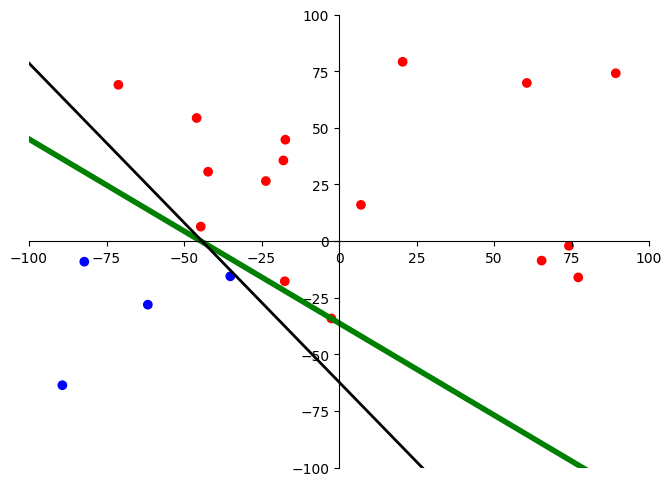

In [ ]:
%matplotlib inline
f, points = genLinearlySeperableData(20)
g, t = PLA(points)
disagree = disagreementRatio(f,g,100)
print("PLA reached hyperplane:", g,
      "\noriginal hyperplane is:", f,
      "\nnumber of iterations PLA took:", t,
      "\nf and g disagreement percentage: ", disagree * 100, "%")

plotData2D(f, g, points)

we can observe that g is relatively close f but not necessarily the same
since there can be many hyperplanes to classify a dataset.
## exercise b
we will now repeat the experiment with another dataset of 20 points

params D=2 N=20: 
	PLA reached hyperplane: [92.67075548 23.9674624  -2.        ] 
	original hyperplane is: [ 4.81980168  1.1619925  35.26676488] 
	number of iterations PLA took: 2 
	f and g disagreement percentage:  3.0 %


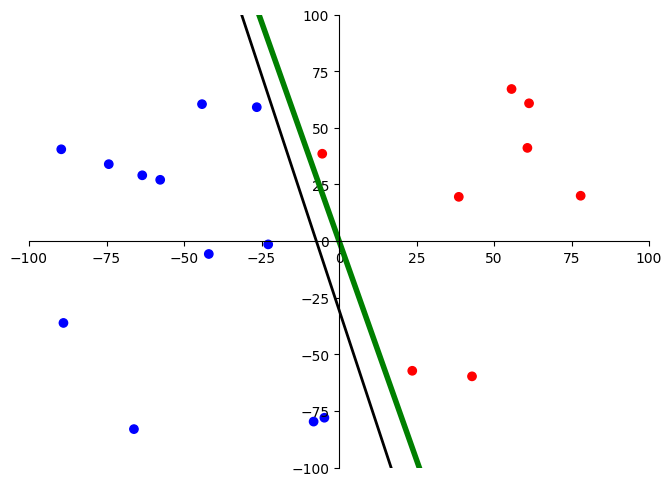

In [ ]:
f, points = genLinearlySeperableData(20)
g, t = PLA(points)
disagree = disagreementRatio(f,g,100)
print("params D=2 N=20:",
      "\n\tPLA reached hyperplane:", g,
      "\n\toriginal hyperplane is:", f,
      "\n\tnumber of iterations PLA took:", t,
      "\n\tf and g disagreement percentage: ",disagree*100,"%")

plotData2D(f, g, points)

again we can observe that there is variability of roughly 15-0% in the disagreement of f and g
on a random set of data points and there is a greate variability of roughly 1,500 - 1 in the
number of iterations it takes to reach g

## exercise c
we will now do the same but with a dataset of 100 points

params D=2 N=100: 
	PLA reached hyperplane: [  48.50135205   20.25458469 1564.        ] 
	original hyperplane is: [ 2.14575871  0.89680311 70.25486711] 
	number of iterations PLA took: 1976 
	f and g disagreement percentage:  0.0 %


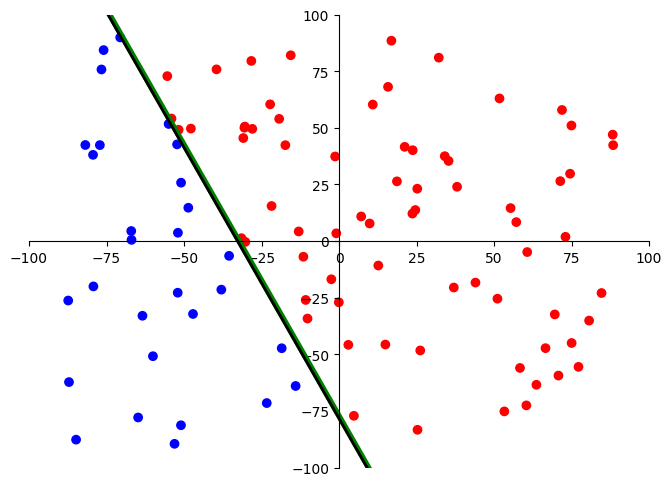

In [ ]:
f, points = genLinearlySeperableData(100)
g, t = PLA(points)
disagree = disagreementRatio(f, g, 100)
print("params D=2 N=100:",
      "\n\tPLA reached hyperplane:", g,
      "\n\toriginal hyperplane is:", f,
      "\n\tnumber of iterations PLA took:", t,
      "\n\tf and g disagreement percentage: ", disagree * 100, "%")

plotData2D(f, g, points)


we observe that the size and variability in the disagreement of the of f and g is significantly reduced to about 5-0% which means
f and g become much closer but the size and variability in the amount of iterations it takes to reach g has significantly increased to about 5,000-1

## exercise d

same experiment but with 1000 datapoints

params D=2, N=1000: 
	PLA reached hyperplane: [   51.61209105   149.30592592 -4135.        ] 
	original hyperplane is: [  1.00313127   2.86569515 -78.80856626] 
	number of iterations PLA took: 8885 
	f and g disagreement percentage:  0.0 %


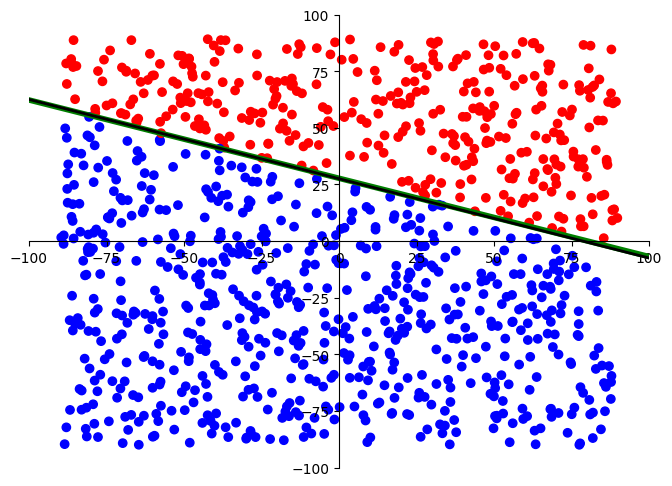

In [ ]:
f, points = genLinearlySeperableData(1000)
g, t = PLA(points)
disagree = disagreementRatio(f, g, 100)
print("params D=2, N=1000:",
      "\n\tPLA reached hyperplane:", g,
      "\n\toriginal hyperplane is:", f,
      "\n\tnumber of iterations PLA took:", t,
      "\n\tf and g disagreement percentage: ", disagree * 100, "%")

plotData2D(f, g, points)

Here we observe a continuation of the direction of C and B, as the size
of the dataset increases f and g come closer to being the same and the amount
of iterations needed to reach g is increased proportionally. Here the disagreement
percentage is about 2-0% and the number of iterations is about 100,000-5,000

## exercise e

we will run 100 iterations of the experiment on the same dataset of 1000 10 dimentional points but instead of using the regular PLA algorithm we defined, we will run PLA algorithm that picks a misclassified point to learn from randomly each time and instead of plotting the result (since it's 10 dimentional it will be difficult) we will plot a histogram of the amount of iterations each experiment took to converge. for this we must first define the modified version of PLA, we'll put it in a new function called PLARandom, and then we will execute the experiment 

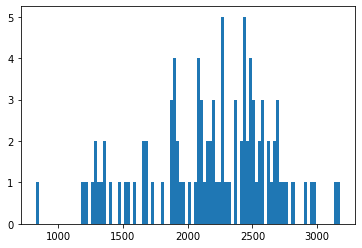

In [27]:
#input: same as PLA function modifies dataset element order
#output: same as PLA function execpt we iterate points randomly
# instead of in order they sit in the dataset
def PLARandom(points):
    w = np.array([0 for _ in range(DIMENSION+1)], dtype=float) #weights vector
    updated = True #init to True so we will do at least one check agaist all the points
    t = 0 #iterations counter

    while updated:
        updated = False #assume no iterations are needed and we have reached w = w*
        rand.shuffle(points) #shuffle the array so the order of misclassified points by which
        # we update w changes
        for p in points: #check classification of all points
            x, y = p
            if y*np.dot(w,x) <= 0: #test if point was not correctly classified
                w = w + y*x #if not, learn from it
                updated = True #we have made an update and therefore must continue iterating
                t = t + 1 #increase iteration counter and continue looping
    return w, t

DIMENSION = 10 # set the dimension
num_experiments = 100
f0, points0 = genLinearlySeperableData(1000) #generate dataset
t0History = []
for _ in range(num_experiments):
    _, t0 = PLARandom(points0) #run an experiment
    t0History.append(t0) #save amout of iterations it took

# plot historgram of amount of iterations each experiment took
fig, ax = plt.subplots()
ax.hist(t0History, bins=num_experiments)
plt.show()

## exercise f
From this and the previous experiments we can deduce that as N (number of points in the data set) and D (dimention of data) increase so does the accuracy of the algorithm but also the number of iterations it takes to achive convergence in the PLA.